In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import api_key
from api_keys import g_key
from datetime import date

In [2]:
# Reading the census data into corresponding dataframe
cityCensus_1940 = pd.read_csv("../Data/cityCensus_1940.csv")
cityCensus_1950 = pd.read_csv("../Data/cityCensus_1950.csv")
cityCensus_1960 = pd.read_csv("../Data/cityCensus_1960.csv")
cityCensus_1970 = pd.read_csv("../Data/cityCensus_1970.csv")
cityCensus_1980 = pd.read_csv("../Data/cityCensus_1980.csv")
cityCensus_1990 = pd.read_csv("../Data/cityCensus_1990.csv")
cityCensus_2000 = pd.read_csv("../Data/cityCensus_2000.csv")
cityCensus_2010 = pd.read_csv("../Data/cityCensus_2010.csv")


In [3]:
cityCensus_1940

,Unnamed: 0,City,State,Population,Location,Latitude,Longitude
0,0,New York,New York,7454995,Northeast,40.712775,-74.005973
1,1,Chicago,Illinois,3396808,Midwest,41.878114,-87.629798
2,2,Philadelphia,Pennsylvania,1931334,Northeast,39.952584,-75.165222
3,3,Detroit,Michigan,1623452,Midwest,42.331427,-83.045754
4,4,Los Angeles,California,1504277,West,34.052234,-118.243685
...,...,...,...,...,...,...,...
95,95,Evansville,Indiana,97062,Midwest,37.971559,-87.571090
96,96,Allentown,Pennsylvania,96904,Northeast,40.602294,-75.471410
97,97,El Paso,Texas,96810,South,31.761878,-106.485022
98,98,Savannah,Georgia,95996,South,32.080899,-81.091203


In [4]:
cityCensus_1940.drop(columns="Unnamed: 0",inplace=True)
cityCensus_1940.sort_values(["Population","City"],ascending=False,inplace=True)
cityCensus_1940

,City,State,Population,Location,Latitude,Longitude
0,New York,New York,7454995,Northeast,40.712775,-74.005973
1,Chicago,Illinois,3396808,Midwest,41.878114,-87.629798
2,Philadelphia,Pennsylvania,1931334,Northeast,39.952584,-75.165222
3,Detroit,Michigan,1623452,Midwest,42.331427,-83.045754
4,Los Angeles,California,1504277,West,34.052234,-118.243685
...,...,...,...,...,...,...
95,Evansville,Indiana,97062,Midwest,37.971559,-87.571090
96,Allentown,Pennsylvania,96904,Northeast,40.602294,-75.471410
97,El Paso,Texas,96810,South,31.761878,-106.485022
98,Savannah,Georgia,95996,South,32.080899,-81.091203


In [5]:
cityCensus_1950.drop(columns="Unnamed: 0",inplace=True)


In [6]:
cityCensus_1960.drop(columns="Unnamed: 0",inplace=True)
cityCensus_1970.drop(columns="Unnamed: 0",inplace=True)
cityCensus_1980.drop(columns="Unnamed: 0",inplace=True)
cityCensus_1990.drop(columns="Unnamed: 0",inplace=True)
cityCensus_2000.drop(columns="Unnamed: 0",inplace=True)
cityCensus_2010.drop(columns="Unnamed: 0",inplace=True)

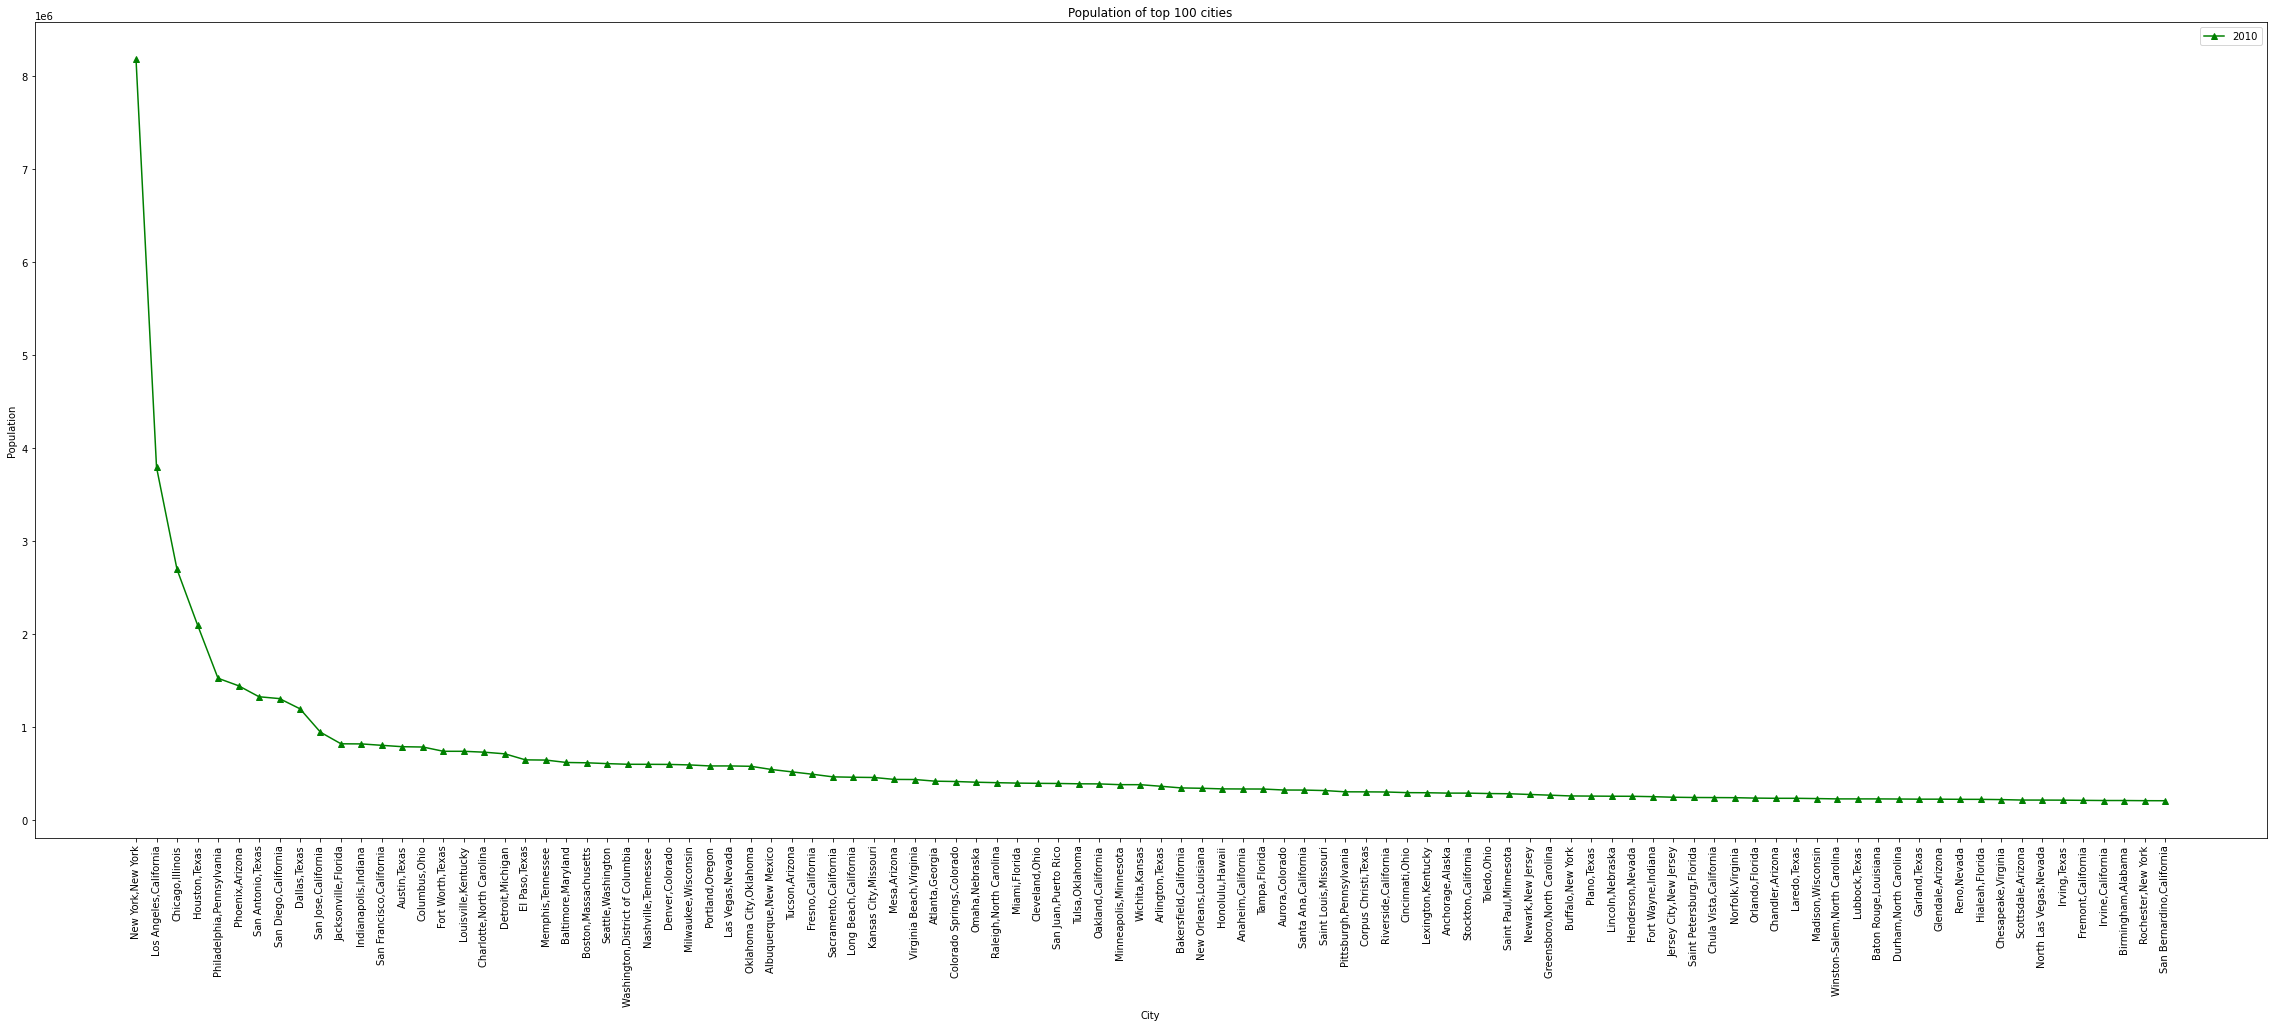

In [7]:
#x_axis=np.arange(cityCensus_1940['City'])
#y_axis=

plt.rcParams["figure.figsize"] = [40, 15]

#plt.plot(cityCensus_1940['City'] +","+ cityCensus_1940['State'], cityCensus_1940['Population'],label="1940", color="r", marker="^")
#plt.plot(cityCensus_1950['City'] +","+ cityCensus_1950['State'], cityCensus_1950['Population'], color="b",marker="o", label="1950")
plt.plot(cityCensus_2010['City'] +","+ cityCensus_2010['State'], cityCensus_2010['Population'], color="g",marker="^", label="2010")

plt.xticks(rotation="vertical")
plt.title("Population of top 100 cities")
plt.xlabel("City")
plt.ylabel("Population")

#plt.savefig("../Images/pyplot_bar.png")
#plt.show()
#plt.figure(figsize=(10,10))
plt.legend()
plt.show()

In [10]:
energy_generated = pd.read_csv("../Data/US_Nuclear_Generating_Stats_1971-2019.csv", encoding='utf-8')

In [11]:
energy_generated.head()

,YEAR,TOTAL ELECTRICITY GENERATION (MWH),NUCLEAR GENERATION (MWH),NUCLEAR FUEL SHARE (PERCENT),CAPACITY FACTOR (PERCENT),SUMMER CAPACITY (MW)
0,1971,"1,615,853,616","38,104,545",2.4,48.2,"9,033"
1,1972,"1,752,978,413","54,091,135",3.1,42.5,"14,481"
2,1973,"1,864,056,631","83,479,463",4.5,53.5,"22,683"
3,1974,"1,870,319,405","113,975,740",6.1,47.8,"31,867"
4,1975,"1,920,754,569","172,505,075",9.0,55.9,"37,267"


In [12]:
energy_generated.columns

Index(['YEAR', 'TOTAL ELECTRICITY GENERATION (MWH)',
       'NUCLEAR GENERATION (MWH)', 'NUCLEAR FUEL SHARE (PERCENT)',
       'CAPACITY FACTOR (PERCENT)', 'SUMMER CAPACITY (MW)'],
      dtype='object')

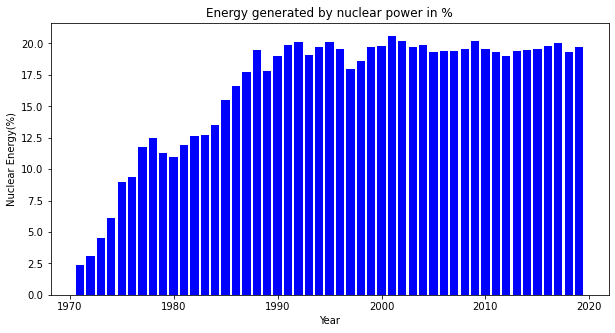

<Figure size 720x360 with 0 Axes>

In [13]:
x_axis=energy_generated['YEAR']
y_axis=energy_generated['NUCLEAR FUEL SHARE (PERCENT)']
plt.rcParams["figure.figsize"] = [10, 5]
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.title('Energy generated by nuclear power in %')
plt.xlabel('Year')
plt.ylabel('Nuclear Energy(%)')
plt.show()
plt.tight_layout()


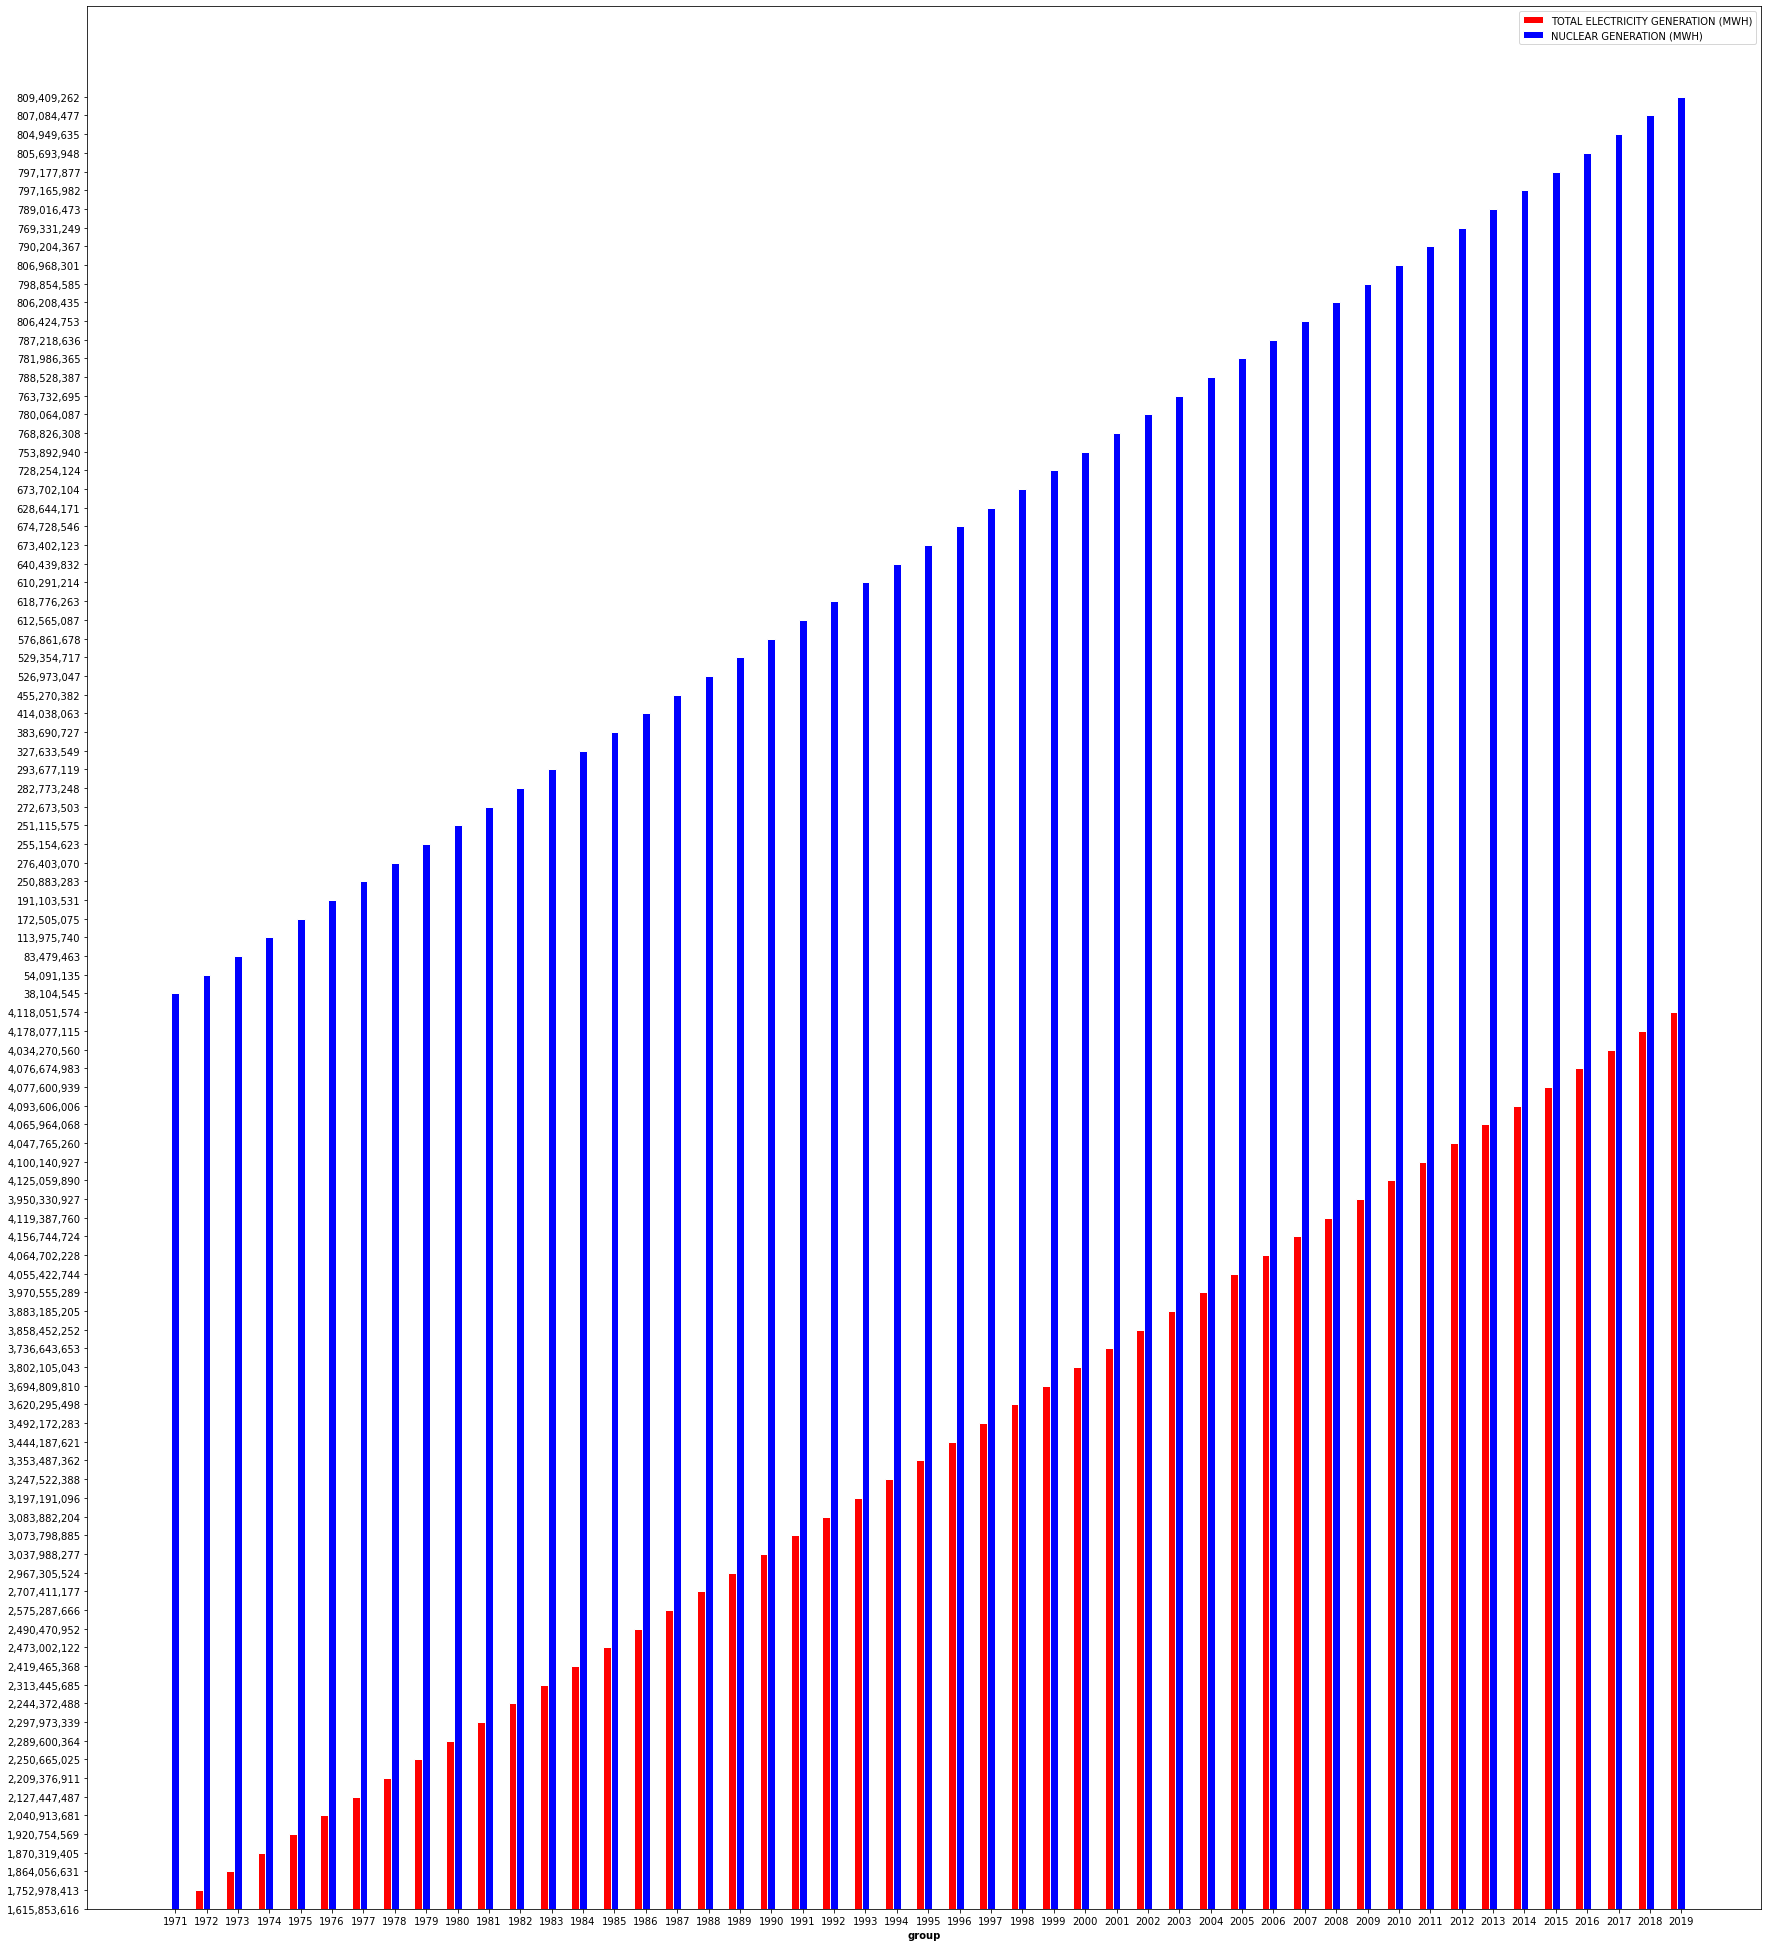

<Figure size 2160x2520 with 0 Axes>

In [34]:
barWidth = 0.25
 
# set height of bar
bars1 = energy_generated['TOTAL ELECTRICITY GENERATION (MWH)']
bars2 = energy_generated['NUCLEAR GENERATION (MWH)']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='TOTAL ELECTRICITY GENERATION (MWH)')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='NUCLEAR GENERATION (MWH)')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], energy_generated['YEAR'])
#plt.xlim(1970, 2019)
#plt.ylim(38104545, 4118051574)
# Create legend & Show graphic
plt.legend()
plt.show()
plt.tight_layout()
